This is a demonstration on the new structure of the bivariate package. It now uses classes, so the way we interact with the package is a bit different. Note: as of this commit, only the files `data_setup.py` and `data_exploration.py` have been incorporated in the class.

The idea is as follows: the user can create a `BivariateDataset` object from a csv file, SURFdrive link, or a Pandas `DataFrame`. The `BivarateDatset` class contains the functionality of the original package, but all of the old functions are now methods of the new class. This cleans up the code quite a bit, since we don't have to pass the dataframe and column names to every funtion.

We can import the new class with just one line:

In [1]:
from class_dataset import Dataset
# RL: this will eventually be included in an __init__.py file in this directory

In this demonstration, I've used the same file as the one in `Test_Climate.py`. It is a file from the SURFdrive. 

In [2]:
test_folder = "https://surfdrive.surf.nl/files/index.php/s/Wg6SWc38zn8jqVg"
test_path = "subfolder01/subfolder02/Climate_Data_Washington_Metric.csv"

col_names = ["POWER", "CLOUD_BROKEN"]
col_time = "DATE_TIME"

Now, we can create a `BivariateDataset` object directly from a SURFdrive link by using either the `from_surfdrive_path` or `from_surfdrive_file` classmethods:

In [3]:
bs = Dataset.import_from_surfdrive_path(
        test_folder, test_path, col_time, col_names)

In [4]:
bs._cols

['POWER', 'CLOUD_BROKEN']

The rest is really easy. For example we can clean the dataset:

In [5]:
bs.clean_dataset()

Make a time plot:

(<Figure size 720x720 with 2 Axes>,
 array([<AxesSubplot:xlabel='DATE_TIME'>, <AxesSubplot:xlabel='DATE_TIME'>],
       dtype=object))

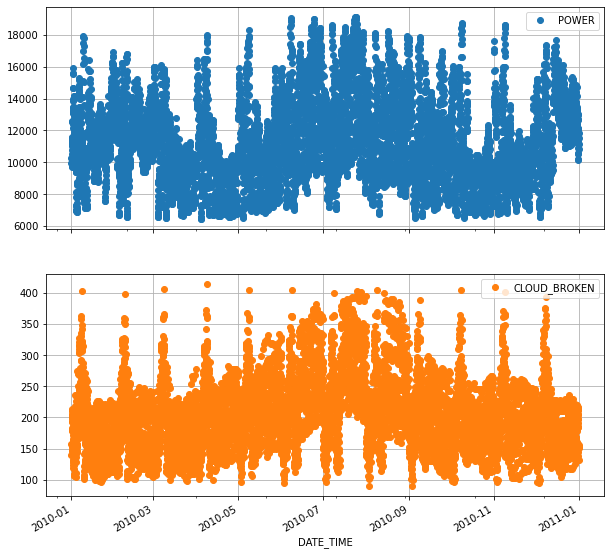

In [6]:
bs.time_plot()

Get a summary of the data:

In [7]:
bs.data_summary()

,POWER,CLOUD_BROKEN
count,8756.000000,8756.000000
mean,11280.123801,204.415715
std,2624.918714,57.807106
min,6430.000000,90.000000
25%,9417.750000,161.000000
50%,10856.500000,197.000000
75%,13042.000000,237.000000
max,19140.000000,414.000000


Or make a histogram:

(<Figure size 720x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'POWER'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'CLOUD_BROKEN'}, ylabel='Frequency'>],
       dtype=object))

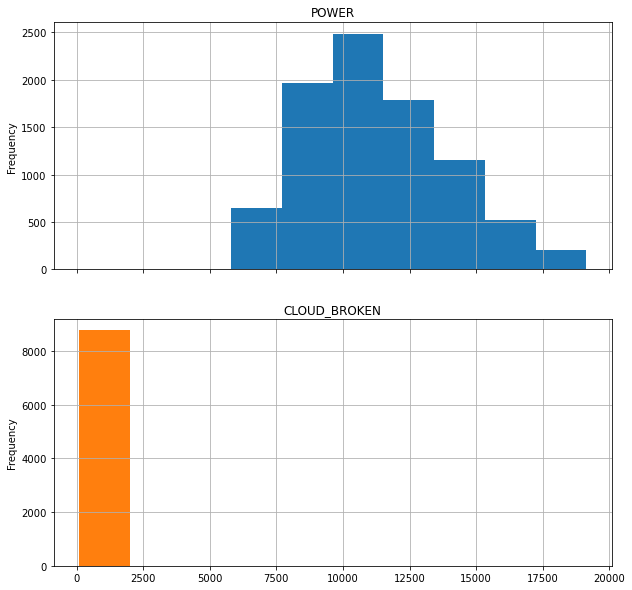

In [8]:
bs.hist_plot()

In [9]:
bs.fit_ev('POWER')

Exception: No extreme values computed yet!

In [ ]:
bs.create_ev(period='W')

,DATE_TIME,POWER,CLOUD_BROKEN
0,2010-01-03 23:00:00,15955.0,236.0
1,2010-01-10 23:00:00,17940.0,402.0
2,2010-01-17 23:00:00,16417.0,262.0
3,2010-01-24 23:00:00,13655.0,227.0
4,2010-01-31 23:00:00,16908.0,228.0
5,2010-02-07 23:00:00,16239.0,360.0
6,2010-02-14 23:00:00,16808.0,397.0
7,2010-02-21 23:00:00,15256.0,249.0
8,2010-02-28 23:00:00,14728.0,247.0
9,2010-03-07 23:00:00,16086.0,361.0


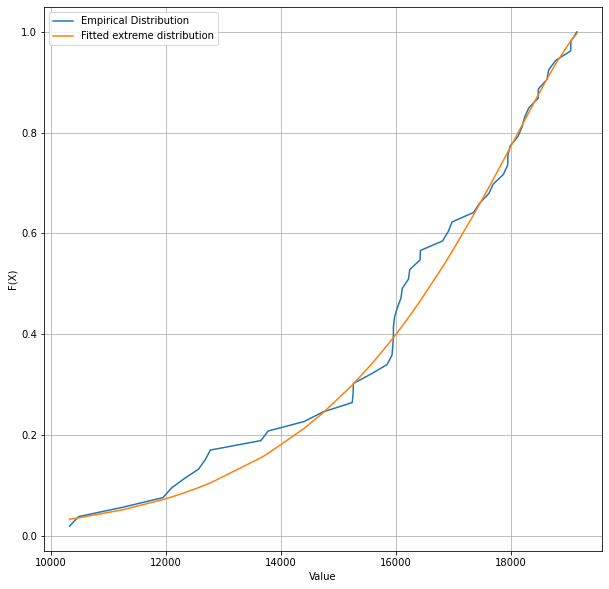

((0.775860549996527, 15777.676573595767, 2643.0375889837605),
 array([0.03256194, 0.03522351, 0.05157167, 0.07151306, 0.07654402,
        0.08499272, 0.09528028, 0.10046858, 0.10457317, 0.15460595,
        0.16300827, 0.21268526, 0.24324665, 0.29870428, 0.30071426,
        0.30095145, 0.33919439, 0.37734286, 0.38970278, 0.39174379,
        0.39306015, 0.39320662, 0.39614474, 0.40341336, 0.41275372,
        0.41610661, 0.43301735, 0.43649088, 0.46534071, 0.46633627,
        0.53332942, 0.55171201, 0.56387032, 0.63644881, 0.65901103,
        0.69132451, 0.70750437, 0.74473644, 0.76106048, 0.7617063 ,
        0.77011013, 0.79949444, 0.81484443, 0.82412933, 0.83985026,
        0.87416856, 0.87543368, 0.90657259, 0.91245821, 0.93655647,
        0.98210406, 0.98270638, 0.99630161]))

In [ ]:
bs.fit_ev(var='POWER')

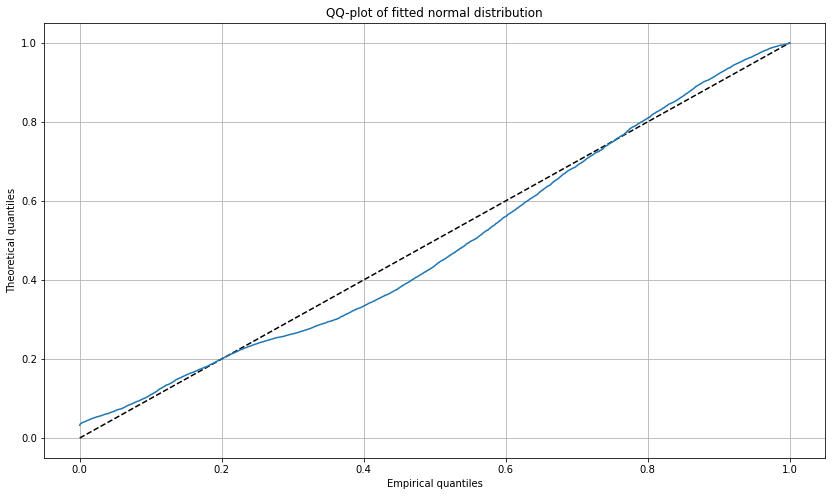

In [ ]:
bs.QQ_plot('POWER', 'normal')